In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
df=pd.read_csv('clean_df.csv',index_col=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


In [3]:
%matplotlib inline

# Analyzing individual pattern of Features
<p> As with most machine learning project the goal is to make prediction based on certain input and corresponding ouput dataset. The predictions we make are influenced postively or negatively by the quality and also how important that feature is to the <b>Target</b>. So the need arises to understand how each feature relates to the <b> Target Variable </b> when it is not combined with other features so as to ascertain how important that feature is.</p>
<p> One of the efficient ways of establishing this relationship is by <em><b> Visualization </b></em> and knowing what type of variable you are dealing with is important in chosing the right <em><b> Visulaization</b><em>

In [4]:
# to get the data type of  each column in our dataset:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
""" First let's run the .corr() method to get a summary of the numerical variablew with data type int64 and float64
 we can see that going along the diagonal that the values are 1.000 this is
because when the correlation of a feature is agianst itself the values is one"""
df.corr().head(10)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098322,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [6]:
#to reduce the amount of information displayed at once we can select for specific features:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187923,0.098322
compression-ratio,0.001263,0.187923,1.000000,-0.214489
horsepower,0.566903,0.098322,-0.214489,1.000000


### Continious numerical variables
<p> This are a type of qunatitative variabe whose value occupy a certain range. They are of data type int64 or float64. A very good way of visualizing these type of variables is by making use of <b>scatterplots</b>. We can create a <b>scatterplot</b> to compare how well the individual variables realtes with the <b>Target</b> which in this case is the price column by calling the <b><em>.regplot()</em></b> function of the <B>SEABORN</B> Library

(0, 56166.5951398558)

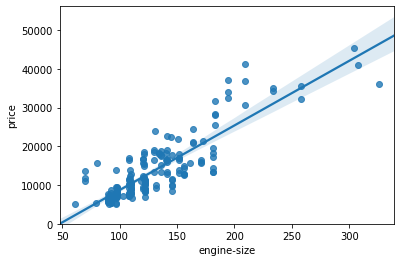

In [7]:
# We are going to compare selected continous variables against the price column
sns.regplot(x='engine-size',y='price', data=df)
#this is to make 0 be the starting value for the yaxis
plt.ylim(0,)

<p> we can see that we obatined a strong and <b><em>positive</em></b> correlation. That is as  the engine size increases there is a proportionate increase in the price. I emphasized on the word <b><em>positive</em></b> because correlation can also be strong and be negative whereby in such cases we would see a corresponding increase in one variable leads to a decrease in the other.

In [8]:
#Creating a function to display the scatterplot based on the column names specified
def reg_plot(x,y):
    sns.regplot(x,y,data=df)
    plt.ylim(0,)

            horsepower     price
horsepower    1.000000  0.809607
price         0.809607  1.000000


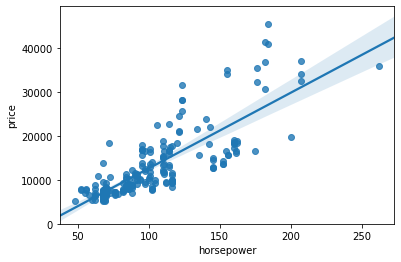

In [9]:
reg_plot(df['horsepower'],df['price'])
# when this plot is displayed we notice almost the same strong and positve correlation pattern that was noticed with engine-size
# let us run .corr() to get the value of the correlation
print(df[['horsepower','price']].corr())
#correlation value ranges from -1 to 1 where -1 represents a perfect negative correlation while +1 reps a perfect positvie correlation


In [10]:
def math(x,y):
    mask=df.columns=='engine-size'
    fig=plt.figure(figsize=(10,8))
    ax0=fig.add_subplot(1,3,1)
    ax1=fig.add_subplot(1,3,2)
    for i in df.columns:
        if i in df[['engine-size','horsepower']]:
            ax0=df.plot(mask,y, kind='scatter', ax=ax0)
            ax1=df.plot(x,y,kind='scatter', ax=ax1)
            plt.show()

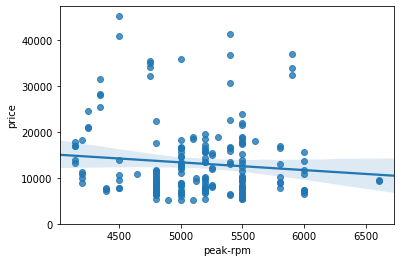

In [11]:
reg_plot(df['peak-rpm'],df['price'])


<p>oops from our above plot peak_rpm is not a good predictor of price due to the fact that the regression line is almost horizontal indicating a weak correlation. We can also notice how scatterd the data points are from the regression line. This implies that a lot of the variablity of the dependent variable which is <B><EM>P</EM></B> is not captured by the Peak-rpm values</p>

In [12]:
#let us the correlation value
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<p>a value of -0.10  is a very weak negative correlation.</p>

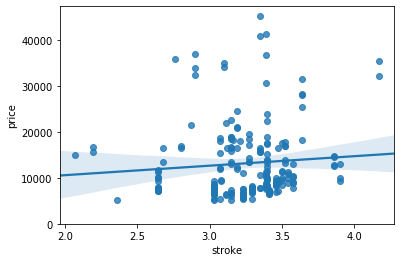

In [13]:
reg_plot(df.stroke, df.price)

In [14]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<p> weak positive correlation</p>

<h3>Categorical variables</h3>

<p>These are also known as quanlitative variables that describe a 'characteristic' of a data unit. They are usually measured using the Nominal or Oridnal scale of measurement when ranking is present in the data. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

<p>relationship between body-style and price </p>

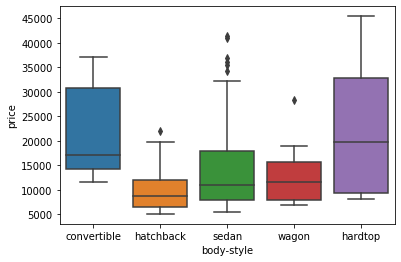

In [15]:
sns.boxplot(x='body-style',y='price',data=df)

<p> From the above box plot of price against body-style there seems to be significant overlap between the body style and price in such a way that we can distinctly say that a certain bodystyle produced this particular price range </p>

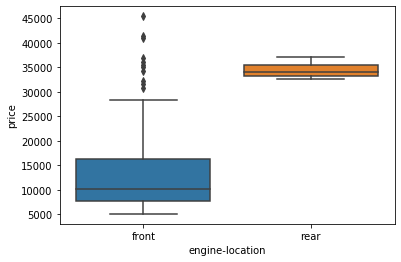

In [16]:
sns.boxplot(x="engine-location", y="price", data=df)

<p> The price distribution as seen from the above box plot shows a distinct value range which implies that engine-location is a good indicator of price</p>

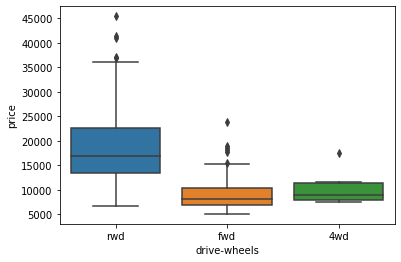

In [17]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p> There is a clear distribution of price between the different drive wheels and as such we might consider it a good predictor of price</p>

## Descriptive Statistical Analysis
<p> Another important step in our EDA is to carry out a descriptive statistical analysis which would enable us to get better insights on how our data variables interact <p>
 we would that in the following cells below
    
    

<p> The <strong>.describe()</strong> function helps us to summarize our data given us a quick overview of important measures of central tendency such as MEAN ,MEDIAN AND Standard Deviation.</p>

In [18]:
#.describe() by default only returns statistical values for all numerical variables and ignores Nan and Obect type data</p>

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
# to return values for variables with data type object
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


### VALUE COUNT
<p>This mehod gives us the count of how many units of each variable in a particular column.The <b><em> .value_counts()</em></b> can only be called on a pandas series.</p>

In [24]:
#calling the .value_count on the drive_wheels column
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<p> we can convert the above series to a data frame by calling the <b>.to_frame</b> method on the <b>.value_counts()</b> method. We assign this value to the variable named drive_wheels_counts

In [29]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [28]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
# to verify that we are dealing with a dataframe we can check the type
print (type(drive_wheels_counts))
print(type(df['drive-wheels']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [34]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p> The importance of calling the . value_counts() method is found particlularly useful here. In the above box plot where we compared engine location to price and we could identify very distinct price distribution pattern, however the fact that we only have 3 values recorded for the <b>rear</b> engine location makes the result skewed which would therefore affect any analysis we carry out.</p>

### Grouping
<p>The <b>.groupby method</b> groups data based on categories belonging to one or more columns. It is simillar to what the pivot table function in excel provides</p> For example we can use this method to calclulate the average price of cars based on their make</p>

In [37]:
# we first determine the unique values in the make column by callling .unique
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [48]:
average_price=df[['make','price','body-style']]

In [49]:
average_price1=average_price.groupby('make').mean()
average_price1


,price
make,
alfa-romero,15498.333333
audi,17859.166667
bmw,26118.750000
chevrolet,6007.000000
dodge,7875.444444
honda,8184.692308
isuzu,8916.500000
jaguar,34600.000000
mazda,10652.882353


In [52]:
#WE can also groub by on more than one column 
average_price2=average_price.groupby(['make','body-style'],as_index=False).mean()

In [53]:
average_price2

,make,body-style,price
0,alfa-romero,convertible,14997.500000
1,alfa-romero,hatchback,16500.000000
2,audi,sedan,17647.000000
3,audi,wagon,18920.000000
4,bmw,sedan,26118.750000
5,chevrolet,hatchback,5723.000000
6,chevrolet,sedan,6575.000000
7,dodge,hatchback,7819.800000
8,dodge,sedan,7619.666667
9,dodge,wagon,8921.000000


<p> we could use the .pivot_table() method to replicate the same effect we have in an excel spread sheet and it makes for grouped data to be more readable</p>

In [76]:
pivot=average_price.pivot_table(index=['make'],columns=['body-style'])

In [77]:
# to replace all the nan values with zero we can use .fillna()
pivot.fillna(0)

price                                            \
body-style    convertible       hardtop     hatchback         sedan   
make                                                                  
alfa-romero       14997.5      0.000000  16500.000000      0.000000   
audi                  0.0      0.000000      0.000000  17647.000000   
bmw                   0.0      0.000000      0.000000  26118.750000   
chevrolet             0.0      0.000000   5723.000000   6575.000000   
dodge                 0.0      0.000000   7819.800000   7619.666667   
honda                 0.0      0.000000   7054.428571   9945.000000   
isuzu                 0.0      0.000000  11048.000000   6785.000000   
jaguar                0.0      0.000000      0.000000  34600.000000   
mazda                 0.0      0.000000  10085.000000  11464.142857   
mercedes-benz     35056.0  36788.000000      0.000000  33074.000000   
mercury               0.0      0.000000  16503.000000      0.000000   
mitsubishi            0.0      0.000000   9597.888889   8434.000000   
nissan                0.0   8249.000000  14409.000000   8604.555556   
peugot                0.0      0.000000      0.000000  15758.571429   
plymouth              0.0      0.000000   8130.500000   7150.500000   
porsche           37028.0  33278.000000  22018.000000      0.000000   
renault               0.0      0.000000   9895.000000      0.000000   
saab                  0.0      0.000000  15013.333333  15433.333333   
subaru                0.0      0.000000   6591.333333   9070.600000   
toyota            17669.0   9762.333333   9616.000000   9542.200000   
volkswagen        11595.0      0.000000   9980.000000   9673.888889   
volvo                 0.0      0.000000      0.000000  18726.875000   

                             
body-style            wagon  
make                         
alfa-romero        0.000000  
audi           18920.000000  
bmw                0.000000  
chevrolet          0.000000  
dodge           8921.000000  
honda           7295.000000  
isuzu              0.000000  
jaguar             0.000000  
mazda              0.000000  
mercedes-benz  28248.000000  
mercury            0.000000  
mitsubishi         0.000000  
nissan          9915.666667  
peugot         15017.500000  
plymouth        8921.000000  
porsche            0.000000  
renault         9295.000000  
saab               0.000000  
subaru          9342.000000  
toyota          9836.000000  
volkswagen     12290.000000  
volvo          16293.333333

<p> To get a pictorial representation of how what our data is saying, we are going to plot a heat map relating how the make of the car with the bodystyle impacts price</p>. We can do this by simply creating a heat map.</p>


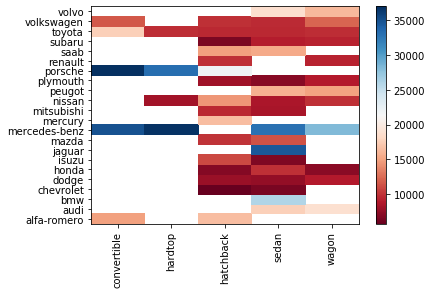

In [81]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')

#label names
# we use the .levels[1] because we not have  hierarichal columns at level 0(price) AND 1(body-style)
row_labels = pivot.columns.levels[1]
col_labels = pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### CORRELATION AND CAUSATION

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr()".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

In [84]:
#like we have seen before
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098322,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [85]:
# we can calcuate correlation also by using he spearmans method
df.corr(method='spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.180029,-0.011853,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683,0.021918,-0.211858,0.211858
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.022405,0.108541,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034,0.258637,-0.096539,0.096539
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.537537,0.218058,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790,0.484472,0.277773,-0.277773
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639575,0.172721,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331,0.661012,0.193300,-0.193300
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.606621,0.237730,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097,0.673376,0.236686,-0.236686
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.222777,-0.036640,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806,0.079883,0.295966,-0.295966
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702016,0.157342,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767,0.805613,0.197509,-0.197509
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.697316,0.292904,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417,0.722111,0.133217,-0.133217
bore,-0.180029,-0.022405,0.537537,0.639575,0.606621,0.222777,0.702016,0.697316,1.000000,-0.083457,-0.169436,0.640574,-0.305171,-0.607415,-0.619292,0.645943,0.607415,0.044483,-0.044483
stroke,-0.011853,0.108541,0.218058,0.172721,0.237730,-0.036640,0.157342,0.292904,-0.083457,1.000000,-0.053223,0.139188,-0.066993,-0.023552,-0.019877,0.117582,0.023552,0.320694,-0.320694


<p> One of the difference between the Pearson correlation and the Spearman correleation is that the Pearson is most appropriate for measurements taken fronm an interval scale, while the Spearman is more appropirate for measurements taken from ordinal scales.</p>

In [87]:
# to work with the P-value lets imports the stat mo

from scipy import stats

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<p>Like before we are going to calculate for correlation using only contionous variables
we are going to determine the correlation the following features have with price</p>
<ul>
<li>Wheel Base</li> 
<li>Horse Power</li> 
<li> Width</li> 
<li>Curb Weight </li> 
<li> Engine Size</li> 
<li> City mpg</li> 
<li> Highway mpg</li>    
</ul>

In [91]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

In [92]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270650862e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

In [93]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158188e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

In [94]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of P = 9.200335510484131e-38


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

## ANOVA (ANALYSIS OF VARIANCE)

<p>Analysis of Variance (ANOVA) procedures are used to compare the means of several
populations. For example Is there a difference in the mean amount spent on vacations for the three minority groups: Asians,
Hispanics, and African Americans? or is there a difference in the mean amount of succesful surgeries between male and female surgeons
For our own scenario we will be calculating ANOVA for groups contained in the column "Drive-wheel" to see if there is a signigfant difference between the groups when related to price </p>

<p>ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

### Drive-Wheels

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [106]:
wheels=df[['drive-wheels','price','make']]

In [111]:
anova=wheels[['drive-wheels','price']].groupby(['drive-wheels'])
anova.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [120]:
# ANOVA
f_val, p_val = stats.f_oneway(anova.get_group('fwd')['price'], anova.get_group('rwd')['price'], anova.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

<p> Let us then compute the anova seperately for each group</p>

In [123]:
f_val, p_val = stats.f_oneway(anova.get_group('fwd')['price'], anova.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [125]:
f_val, p_val = stats.f_oneway(anova.get_group('4wd')['price'], anova.get_group('fwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [126]:
f_val, p_val = stats.f_oneway(anova.get_group('4wd')['price'], anova.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<p> To get a better understanding of ANOVA i will provide a link below to a Youtube tutorial video</p>
<a href='https://www.youtube.com/watch?v=-yQb_ZJnFXw'> <b>Anova tutorial</b><a>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<p>I hope you found this notebook useful. If you have any comments or questions please feel free to </p>  <a href='https://www.linkedin.com/in/adediwura/'> connect with me on Linkedin</a></p>